# Analysis of General Public graphs





In [36]:
import warnings
warnings.filterwarnings("ignore")
import glob
import os
import os.path as op
import sys
sys.path.append(
    '/Users/CN/Documents/Projects/Cambridge/cambridge_language_analysis/')

# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Data Processing
import numpy as np
import pandas as pd
import scipy as sp
import datetime
import re


# Community detection toolbox
import bct
from netneurotools import plotting


In [3]:
# SemanticSpeechGraph functions
from compile_graphs_dataset import get_graphs, graph_properties, exclude_empty_graphs
from graph_analysis_functions import print_bidirectional_edges, print_parallel_edges, get_parallel_edges
from word_embedding_analysis import central_words

In [24]:
# --------------------- Import graph data ---------------------------------------
graph_dir = '/Users/CN/Dropbox/speech_graphs/oasis'

# Output directory for figures
output_figures = op.join(graph_dir, 'figures')

output_dir = op.join(graph_dir, 'output')
oasis = pd.read_csv(op.join(graph_dir, 'output/graph_data_all_avg.csv'))

print('Described {0} graphs.\n{1} subjects described {2} ± {3} pictures.'.format(oasis.shape[0], len(oasis.subj.unique()), round(oasis.subj.value_counts().mean(),2), round(oasis.subj.value_counts().std(),2)))

# Make subj categorical
oasis.subj = pd.Categorical(oasis.subj.astype('str'))
# Reorder group categories
oasis['group'] = pd.Categorical(oasis.group)
oasis.group.cat.reorder_categories(
    ['CON', 'CHR', 'FEP'], inplace=True)

Described 53 graphs.
53 subjects described 1.0 ± 0.0 pictures.


# Control for network size in Oasis data
1. Estimate relationship between number of nodes and connected component measures general public data
2. Regress association out of Oasis data

In [26]:
# Exclude subject 12 with bad quality transcript
oasis = oasis[oasis.subj != 12]
oasis.subj.unique()
output_figures_oasis = '/Users/CN/Dropbox/speech_graphs/oasis/figures'

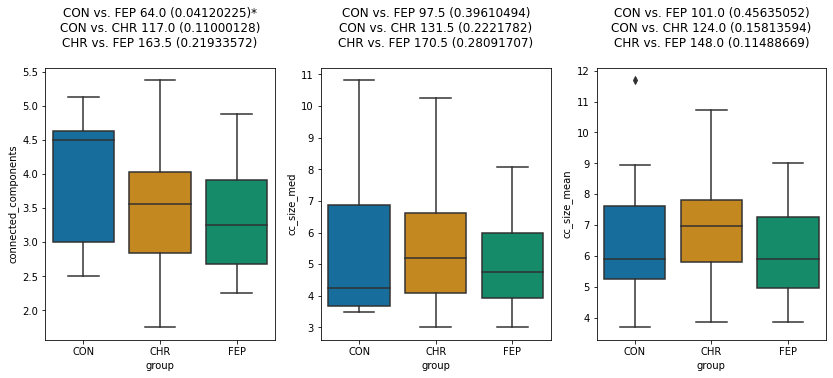

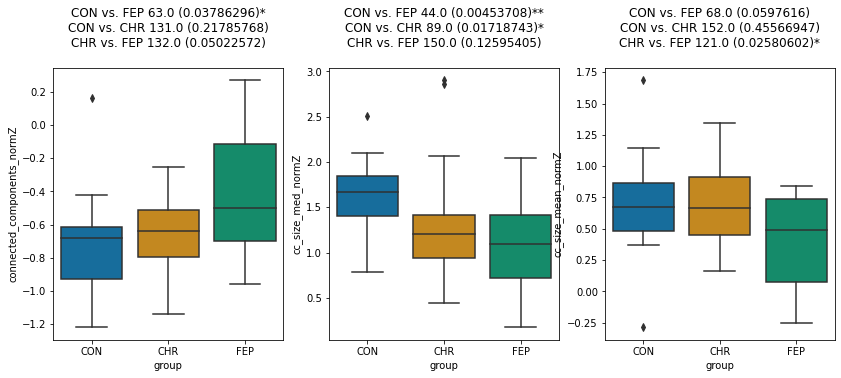

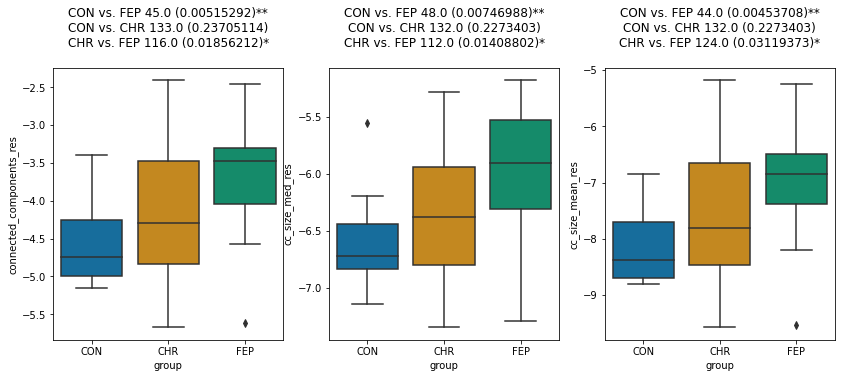

In [27]:
variables = ['connected_components', 'cc_size_med', 'cc_size_mean']

# ------------ Plot the raw connected component values ------------
group_comparisons = [('CON', 'FEP'), ('CON', 'CHR'), ('CHR', 'FEP')]

fig = plt.figure(figsize=(14, 5))
for v,variable in enumerate(variables):
    ax = plt.subplot(1, 3, v+1)
    sns.boxplot(y=variable, x='group',
              data=oasis,
              palette="colorblind",
              )
    results_mwu = []
    results_ttest = []
    stats_summary = ''
    for c, comb in enumerate(group_comparisons):
        a = oasis.query('group == @comb[0]')[variable]
        b = oasis.query('group == @comb[1]')[variable]
        results_mwu.append(sp.stats.mannwhitneyu(a,b))
        results_ttest.append(sp.stats.ttest_ind(a,b))
        # print('{0} vs. {1} {2} ({3})'.format(comb[0], comb[1], round(results_mwu[c][0],8), round(results_mwu[c][1],8) ))
        if results_mwu[c][1] < 0.001:
            symbol = '***'
        elif results_mwu[c][1] < 0.01:
            symbol = '**'
        elif results_mwu[c][1] < 0.05:
            symbol = '*'
        else:
            symbol = ''
        stats_summary = stats_summary + '{0} vs. {1} {2} ({3}){4}\n'.format(comb[0], comb[1], round(results_mwu[c][0],8), round(results_mwu[c][1],8), symbol)
    plt.title(stats_summary)
plt.subplots_adjust(hspace = 0.4)
output = op.join(output_figures, 'Hist_{}' +
                 '_{}'.format('_'.join(variables), str(datetime.date.today())))
plt.savefig(output)
plt.show(block=False)




# ------------ Plot the residualised connected component values ------------
variable_list = [v + '_normZ' for v in variables]

group_comparisons = [('CON', 'FEP'), ('CON', 'CHR'), ('CHR', 'FEP')]

fig = plt.figure(figsize=(14, 5))
for v,variable in enumerate(variable_list):
    ax = plt.subplot(1, 3, v+1)
    sns.boxplot(y=variable, x='group',
              data=oasis,
              palette="colorblind",
              )
    results_mwu = []
    results_ttest = []
    stats_summary = ''
    for c, comb in enumerate(group_comparisons):
        a = oasis.query('group == @comb[0]')[variable]
        b = oasis.query('group == @comb[1]')[variable]
        results_mwu.append(sp.stats.mannwhitneyu(a,b))
        results_ttest.append(sp.stats.ttest_ind(a,b))
        # print('{0} vs. {1} {2} ({3})'.format(comb[0], comb[1], round(results_mwu[c][0],8), round(results_mwu[c][1],8) ))
        if results_mwu[c][1] < 0.001:
            symbol = '***'
        elif results_mwu[c][1] < 0.01:
            symbol = '**'
        elif results_mwu[c][1] < 0.05:
            symbol = '*'
        else:
            symbol = ''
        stats_summary = stats_summary + '{0} vs. {1} {2} ({3}){4}\n'.format(comb[0], comb[1], round(results_mwu[c][0],8), round(results_mwu[c][1],8), symbol)
    plt.title(stats_summary)
plt.subplots_adjust(hspace = 0.4)
output = op.join(output_figures, 'Hist_{}' +
                 '_{}'.format('_'.join(variable_list), str(datetime.date.today())))
plt.savefig(output)
plt.show(block=False)


# ------------ Plot the residualised connected component values ------------
variable_list = [v + '_res' for v in variables]

group_comparisons = [('CON', 'FEP'), ('CON', 'CHR'), ('CHR', 'FEP')]

fig = plt.figure(figsize=(14, 5))
for v,variable in enumerate(variable_list):
    ax = plt.subplot(1, 3, v+1)
    sns.boxplot(y=variable, x='group',
              data=oasis,
              palette="colorblind",
              )
    results_mwu = []
    results_ttest = []
    stats_summary = ''
    for c, comb in enumerate(group_comparisons):
        a = oasis.query('group == @comb[0]')[variable]
        b = oasis.query('group == @comb[1]')[variable]
        results_mwu.append(sp.stats.mannwhitneyu(a,b))
        results_ttest.append(sp.stats.ttest_ind(a,b))
        # print('{0} vs. {1} {2} ({3})'.format(comb[0], comb[1], round(results_mwu[c][0],8), round(results_mwu[c][1],8) ))
        if results_mwu[c][1] < 0.001:
            symbol = '***'
        elif results_mwu[c][1] < 0.01:
            symbol = '**'
        elif results_mwu[c][1] < 0.05:
            symbol = '*'
        else:
            symbol = ''
        stats_summary = stats_summary + '{0} vs. {1} {2} ({3}){4}\n'.format(comb[0], comb[1], round(results_mwu[c][0],8), round(results_mwu[c][1],8), symbol)
    plt.title(stats_summary)
plt.subplots_adjust(hspace = 0.4)
output = op.join(output_figures, 'Hist_{}' +
                 '_{}'.format('_'.join(variable_list), str(datetime.date.today())))
plt.savefig(output)
plt.show(block=False)




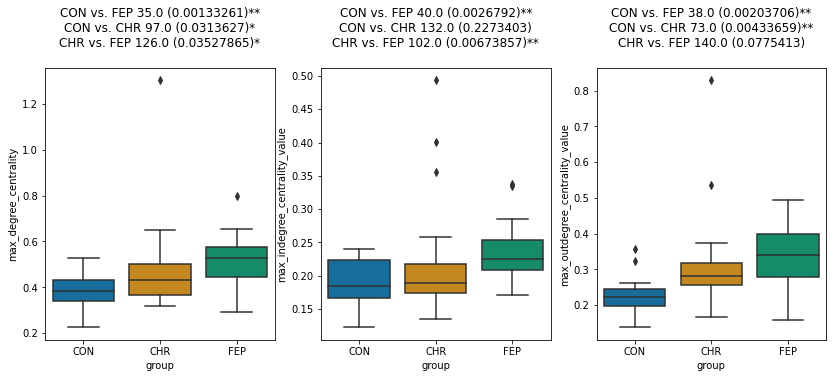

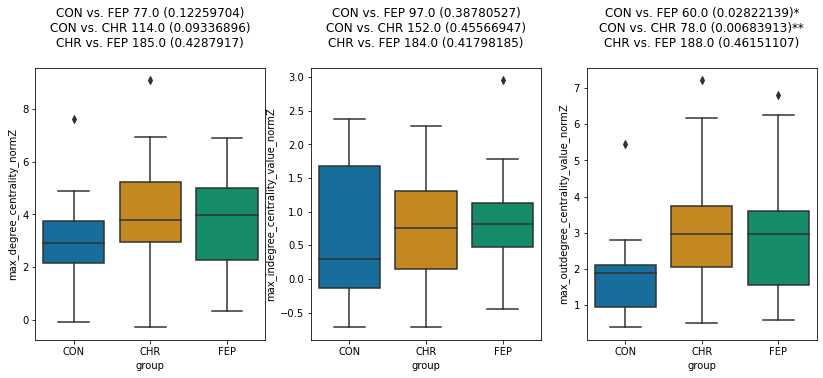

In [33]:
variables = ['max_degree_centrality',
 'max_indegree_centrality_value',
 'max_outdegree_centrality_value']


# ------------ Plot the raw connected component values ------------
group_comparisons = [('CON', 'FEP'), ('CON', 'CHR'), ('CHR', 'FEP')]

fig = plt.figure(figsize=(14, 5))
for v,variable in enumerate(variables):
    ax = plt.subplot(1, 3, v+1)
    sns.boxplot(y=variable, x='group',
              data=oasis,
              palette="colorblind",
              )
    results_mwu = []
    results_ttest = []
    stats_summary = ''
    for c, comb in enumerate(group_comparisons):
        a = oasis.query('group == @comb[0]')[variable]
        b = oasis.query('group == @comb[1]')[variable]
        results_mwu.append(sp.stats.mannwhitneyu(a,b))
        results_ttest.append(sp.stats.ttest_ind(a,b))
        # print('{0} vs. {1} {2} ({3})'.format(comb[0], comb[1], round(results_mwu[c][0],8), round(results_mwu[c][1],8) ))
        if results_mwu[c][1] < 0.001:
            symbol = '***'
        elif results_mwu[c][1] < 0.01:
            symbol = '**'
        elif results_mwu[c][1] < 0.05:
            symbol = '*'
        else:
            symbol = ''
        stats_summary = stats_summary + '{0} vs. {1} {2} ({3}){4}\n'.format(comb[0], comb[1], round(results_mwu[c][0],8), round(results_mwu[c][1],8), symbol)
    plt.title(stats_summary)
plt.subplots_adjust(hspace = 0.4)
output = op.join(output_figures_oasis, 'Hist_{}' +
                 '_{}'.format('_'.join(variable_list), str(datetime.date.today())))
plt.savefig(output)
plt.show(block=False)


# ------------ Plot the residualised connected component values ------------
variable_list = [v + '_normZ' for v in variables]

group_comparisons = [('CON', 'FEP'), ('CON', 'CHR'), ('CHR', 'FEP')]

fig = plt.figure(figsize=(14, 5))
for v,variable in enumerate(variable_list):
    ax = plt.subplot(1, 3, v+1)
    sns.boxplot(y=variable, x='group',
              data=oasis,
              palette="colorblind",
              )
    results_mwu = []
    results_ttest = []
    stats_summary = ''
    for c, comb in enumerate(group_comparisons):
        a = oasis.query('group == @comb[0]')[variable]
        b = oasis.query('group == @comb[1]')[variable]
        results_mwu.append(sp.stats.mannwhitneyu(a,b))
        results_ttest.append(sp.stats.ttest_ind(a,b))
        # print('{0} vs. {1} {2} ({3})'.format(comb[0], comb[1], round(results_mwu[c][0],8), round(results_mwu[c][1],8) ))
        if results_mwu[c][1] < 0.001:
            symbol = '***'
        elif results_mwu[c][1] < 0.01:
            symbol = '**'
        elif results_mwu[c][1] < 0.05:
            symbol = '*'
        else:
            symbol = ''
        stats_summary = stats_summary + '{0} vs. {1} {2} ({3}){4}\n'.format(comb[0], comb[1], round(results_mwu[c][0],8), round(results_mwu[c][1],8), symbol)
    plt.title(stats_summary)
plt.subplots_adjust(hspace = 0.4)
output = op.join(output_figures, 'Hist_{}' +
                 '_{}'.format('_'.join(variable_list), str(datetime.date.today())))
plt.savefig(output)
plt.show(block=False)

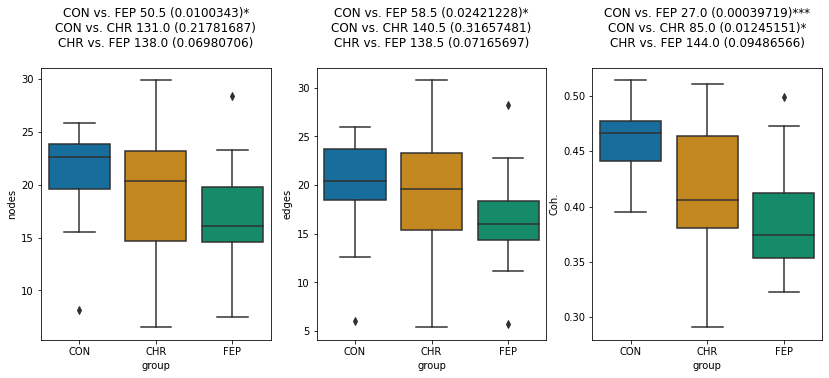

In [34]:
variables = ['nodes', 'edges', 'Coh.']


# ------------ Plot the raw connected component values ------------
group_comparisons = [('CON', 'FEP'), ('CON', 'CHR'), ('CHR', 'FEP')]

fig = plt.figure(figsize=(14, 5))
for v,variable in enumerate(variables):
    ax = plt.subplot(1, 3, v+1)
    sns.boxplot(y=variable, x='group',
              data=oasis,
              palette="colorblind",
              )
    results_mwu = []
    results_ttest = []
    stats_summary = ''
    for c, comb in enumerate(group_comparisons):
        a = oasis.query('group == @comb[0]')[variable]
        b = oasis.query('group == @comb[1]')[variable]
        results_mwu.append(sp.stats.mannwhitneyu(a,b))
        results_ttest.append(sp.stats.ttest_ind(a,b))
        # print('{0} vs. {1} {2} ({3})'.format(comb[0], comb[1], round(results_mwu[c][0],8), round(results_mwu[c][1],8) ))
        if results_mwu[c][1] < 0.001:
            symbol = '***'
        elif results_mwu[c][1] < 0.01:
            symbol = '**'
        elif results_mwu[c][1] < 0.05:
            symbol = '*'
        else:
            symbol = ''
        stats_summary = stats_summary + '{0} vs. {1} {2} ({3}){4}\n'.format(comb[0], comb[1], round(results_mwu[c][0],8), round(results_mwu[c][1],8), symbol)
    plt.title(stats_summary)
plt.subplots_adjust(hspace = 0.4)
output = op.join(output_figures_oasis, 'Hist_{}' +
                 '_{}'.format('_'.join(variable_list), str(datetime.date.today())))
plt.savefig(output)
plt.show(block=False)


# Cluster Measures

4 clusters detected with a modularity of 0.12.


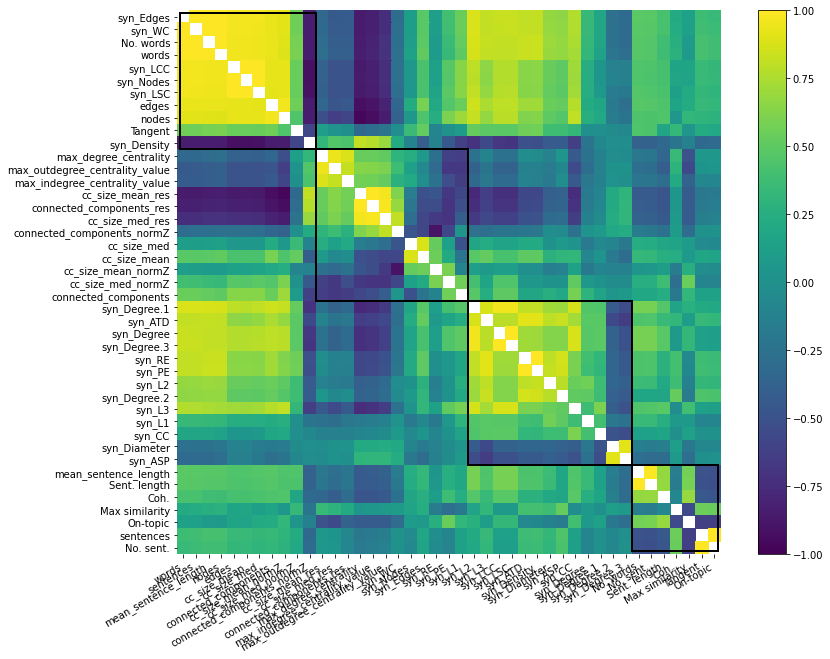

In [39]:
# --------------------- Selected Measures ---------------------------------------
selected_columns = ['words', 'sentences', 'mean_sentence_length', 'nodes', 'edges',
                    'cc_size_mean', 'cc_size_med', 'connected_components',
                    'cc_size_mean_normZ', 'cc_size_med_normZ', 'connected_components_normZ',
                    'cc_size_mean_res', 'cc_size_med_res', 'connected_components_res',
                    'max_degree_centrality', 'max_indegree_centrality_value', 'max_outdegree_centrality_value',
                    'syn_WC', 'syn_Nodes', 'syn_Edges', 'syn_RE', 'syn_PE', 'syn_L1',
                    'syn_L2', 'syn_L3', 'syn_LCC', 'syn_LSC', 'syn_ATD', 'syn_Density',
                    'syn_Diameter', 'syn_ASP', 'syn_CC', 'syn_Degree', 'syn_Degree.1',
                    'syn_Degree.2', 'syn_Degree.3', 'No. words', 'No. sent.',
                    'Sent. length', 'Coh.', 'Max similarity', 'Tangent', 'On-topic']

oasis_selected = oasis[selected_columns]
corrMatrix = oasis_selected.corr()

# Louvain Clustering 

corr = corrMatrix.copy().to_numpy()
nonegative = corr
# nonegative[nonegative < 0] = 0
nonegative = abs(nonegative)

ci, Q = bct.community_louvain(nonegative)
num_ci = len(np.unique(ci))
print('{} clusters detected with a modularity of {:.2f}.'.format(num_ci, Q))

ax = plotting.plot_mod_heatmap(corr, ci, vmin=-1, vmax=1, cmap='viridis',
                               xticklabels=corrMatrix.columns, yticklabels=corrMatrix.columns, figsize=(13.5, 10), xlabelrotation=90)
ax.set_xticklabels(corrMatrix.columns, rotation=30, ha="right")

# plt.xticks(rotation=90)
output = op.join(
    output_figures, 'Clustered_oasis')
plt.savefig(output)
plt.show()



3 clusters detected with a modularity of 0.20.


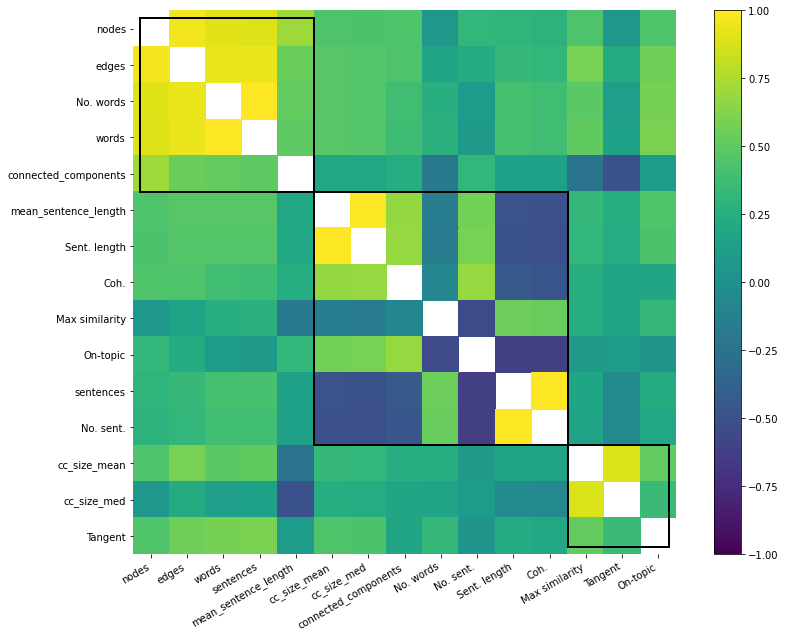

In [40]:

selected_columns = ['nodes', 'edges', 'words', 'sentences', 'mean_sentence_length',
                    'cc_size_mean', 'cc_size_med', 'connected_components',
                    'No. words', 'No. sent.', 'Sent. length',
                    'Coh.', 'Max similarity', 'Tangent', 'On-topic']


oasis_selected = oasis[selected_columns]
corrMatrix = oasis_selected.corr()


# --------------------- Louvain Clustering ---------------------------------------

corr = corrMatrix.copy().to_numpy()
nonegative = corr
# nonegative[nonegative < 0] = 0
nonegative = abs(nonegative)

ci, Q = bct.community_louvain(nonegative)
num_ci = len(np.unique(ci))
print('{} clusters detected with a modularity of {:.2f}.'.format(num_ci, Q))

ax = plotting.plot_mod_heatmap(corr, ci, vmin=-1, vmax=1, cmap='viridis',
                               xticklabels=corrMatrix.columns, yticklabels=corrMatrix.columns, figsize=(13.5, 10), xlabelrotation=90)
ax.set_xticklabels(corrMatrix.columns, rotation=30, ha="right")

# plt.xticks(rotation=90)
output = op.join(
    output_figures, 'Clustered_oasis_cc')
plt.savefig(output)
plt.show()

4 clusters detected with a modularity of 0.22.


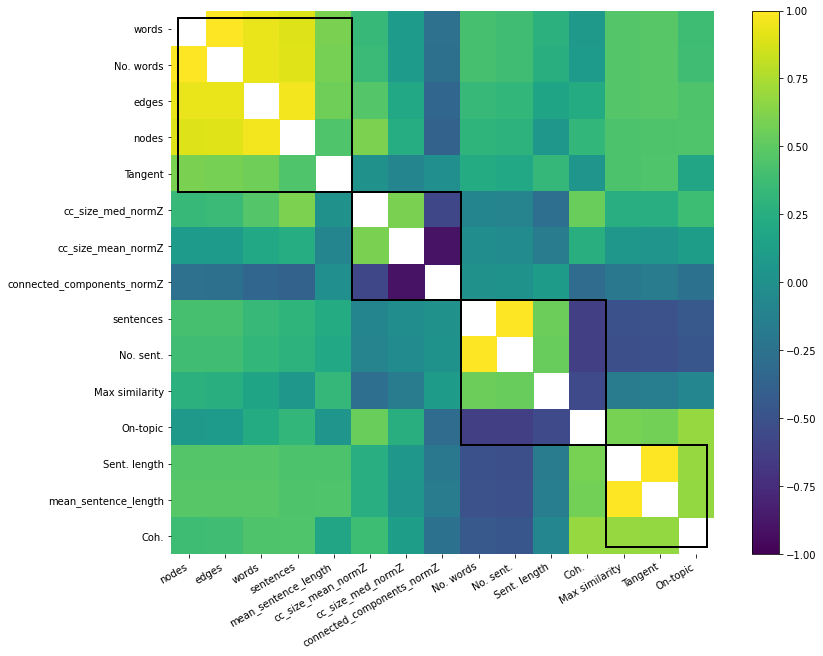

In [41]:

selected_columns = ['nodes', 'edges', 'words', 'sentences', 'mean_sentence_length',
                    'cc_size_mean_normZ', 'cc_size_med_normZ', 'connected_components_normZ',
                    'No. words', 'No. sent.', 'Sent. length',
                    'Coh.', 'Max similarity', 'Tangent', 'On-topic']


oasis_selected = oasis[selected_columns]
corrMatrix = oasis_selected.corr()


# --------------------- Louvain Clustering ---------------------------------------

corr = corrMatrix.copy().to_numpy()
nonegative = corr
# nonegative[nonegative < 0] = 0
nonegative = abs(nonegative)

ci, Q = bct.community_louvain(nonegative)
num_ci = len(np.unique(ci))
print('{} clusters detected with a modularity of {:.2f}.'.format(num_ci, Q))

ax = plotting.plot_mod_heatmap(corr, ci, vmin=-1, vmax=1, cmap='viridis',
                               xticklabels=corrMatrix.columns, yticklabels=corrMatrix.columns, figsize=(13.5, 10), xlabelrotation=90)
ax.set_xticklabels(corrMatrix.columns, rotation=30, ha="right")

# plt.xticks(rotation=90)
output = op.join(
    output_figures, 'Clustered_oasis_ccnorm')
plt.savefig(output)
plt.show()